<a href="https://colab.research.google.com/github/mehdy28/Credit_Scoring/blob/main/Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np

In [24]:
data = pd.read_csv('https://raw.githubusercontent.com/mehdy28/Credit_Scoring/main/data/cr_loan.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [25]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### We notice here that we do have only 2 variables containing some null values

In [26]:
#Function that will return us a table of the % of null values
def null_vals_prct(data):
    nan_p = []
    columns = data.columns
    for i in columns:
        prcnt = len(data[i][data[i].isna() == True]) / len(data[i])*100
        nan_p.append(prcnt)
    Nan_values = pd.DataFrame({'Features' : columns, 'NaN_Prcnt': nan_p}).sort_values(by = 'NaN_Prcnt', ascending = False)
    Nan_values = Nan_values[Nan_values.NaN_Prcnt > 1]
    return(Nan_values)

In [27]:
null_vals_prct(data)

,Features,NaN_Prcnt
7,loan_int_rate,9.563856
3,person_emp_length,2.747000


### We notice here thatthe % off null values is less than 10% so we will proceed to fill it with the mean values

In [28]:
data.loan_int_rate.fillna(value=data.loan_int_rate.mean(), inplace=True)
data.person_emp_length.fillna(value=data.person_emp_length.mean(), inplace=True)

In [29]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [30]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## **Detecing and removing outliers:**

In [31]:
#Create a list of numeric culumns 
obj = ['object']
obj_col = data.select_dtypes(include="object").columns.tolist()
new = data[obj_col]
new.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

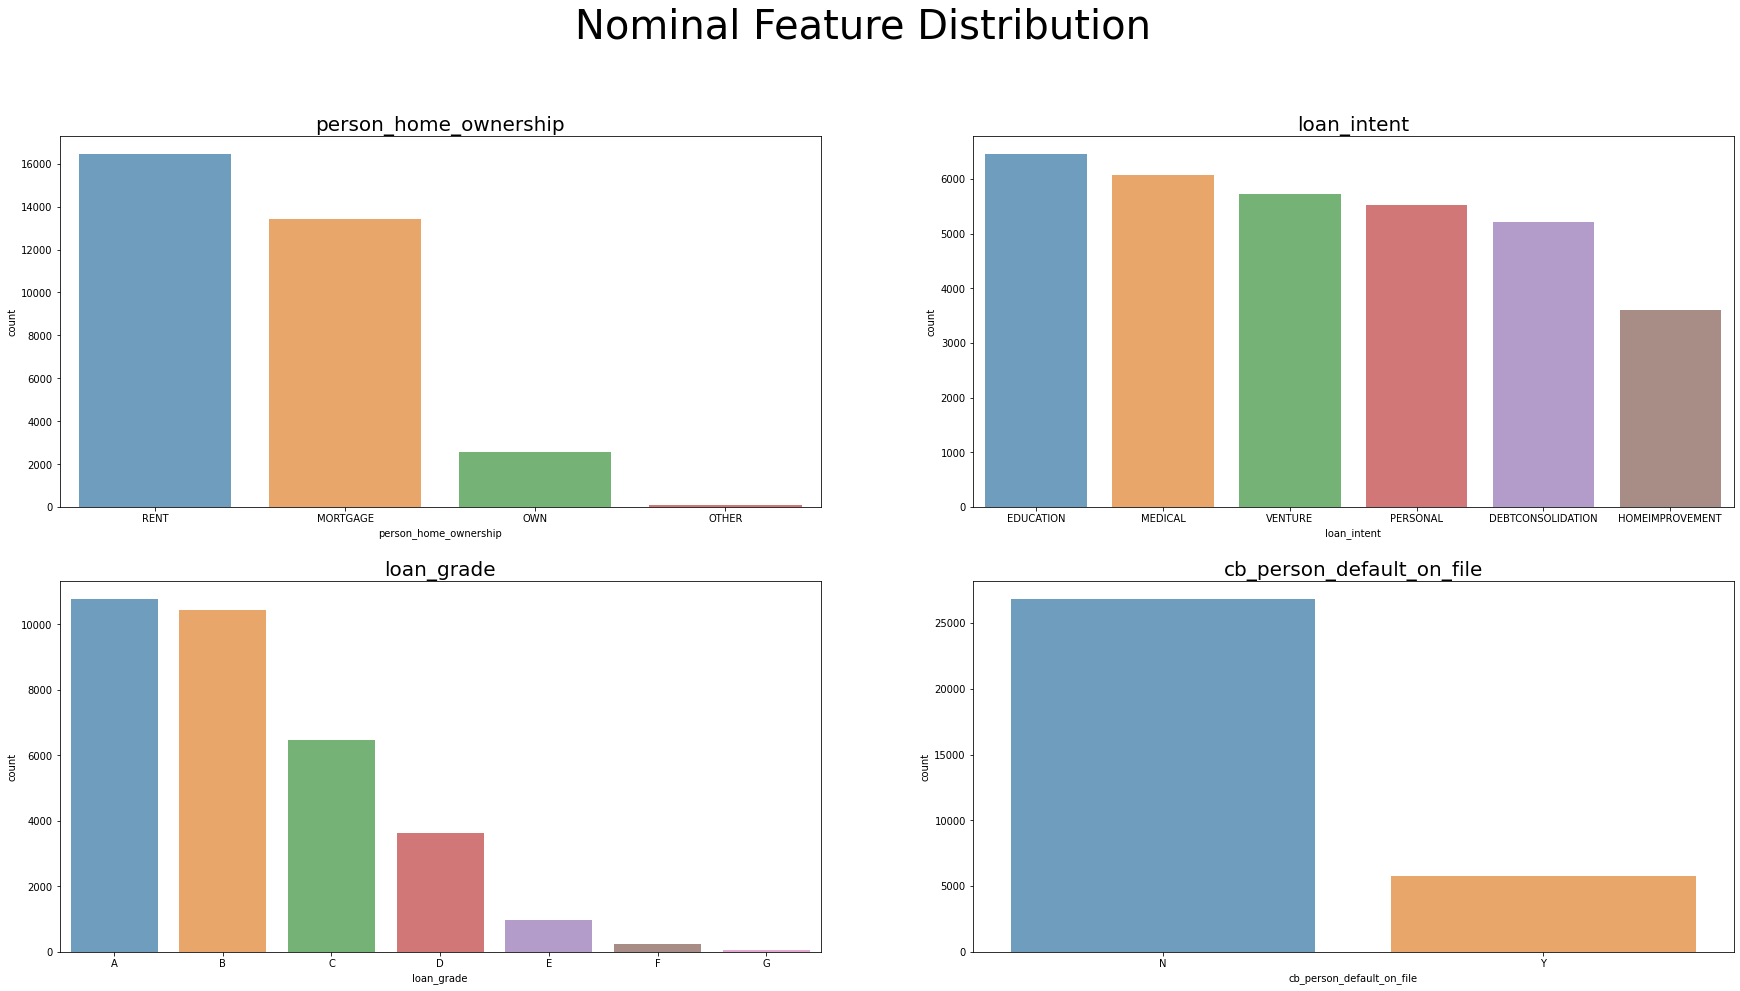

In [33]:
fig, ax = plt.subplots(2,2, figsize=(30, 15))
numeric = data.columns[data.dtypes == 'object']
i = 0 
for col in numeric:
    sns.countplot(col, data= new, ax=ax[i//2][i%2],
                 order=new[col].value_counts().index,
                 alpha=0.7)
    ax[i//2][i%2].set_title(col, fontsize=20)
    i+=1
fig.suptitle("Nominal Feature Distribution ",fontsize=40, y=1)
plt.show()

In [34]:
data.cb_person_default_on_file = data.cb_person_default_on_file.replace(to_replace=['N', 'Y'], value=[0, 1])

In [35]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,1,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,0,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,0,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,1,4


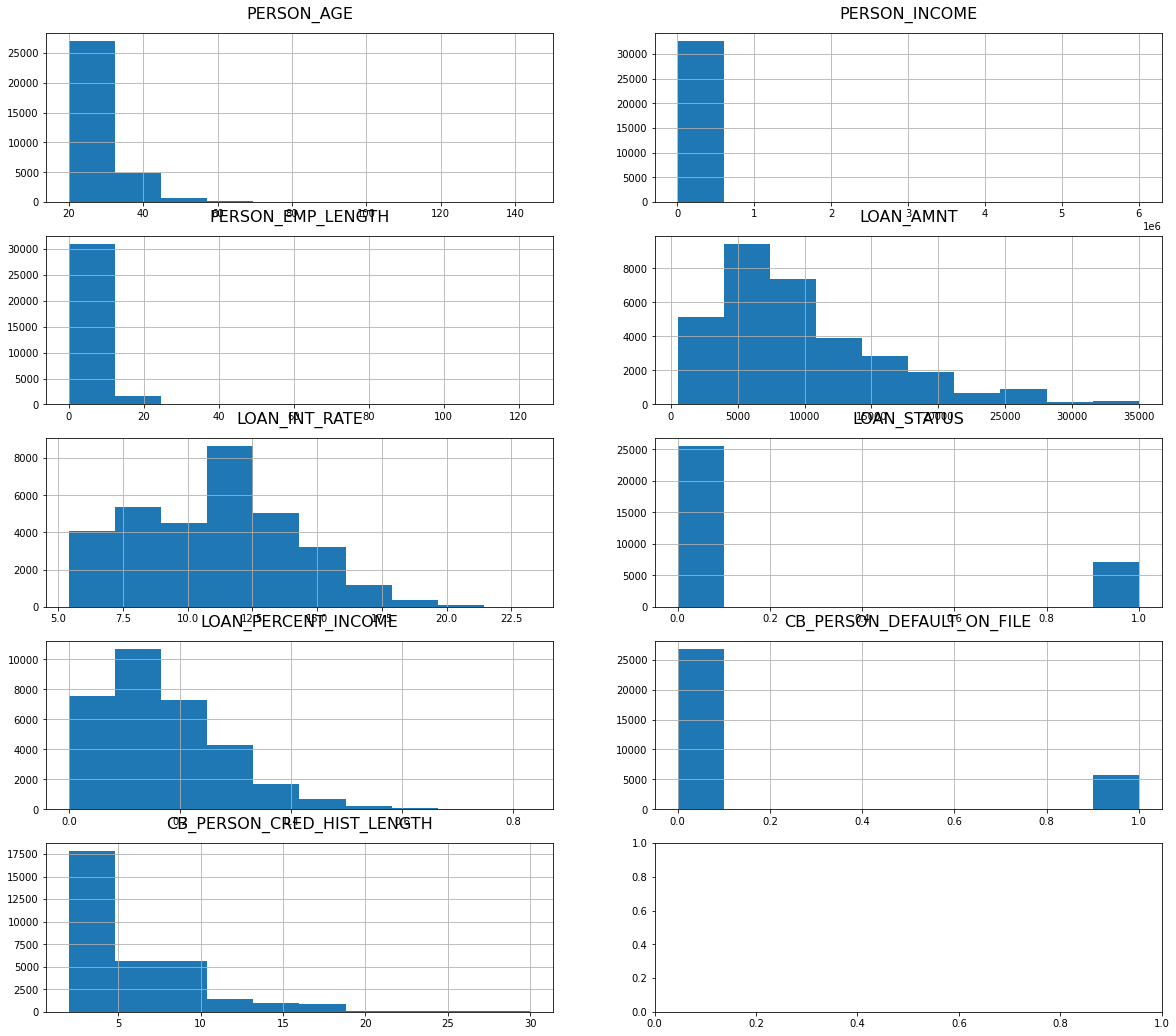

In [37]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(5, 2)

axes = iter(axes.ravel())   # set up an iterator for the set of axes. 

numeric = data.columns[data.dtypes != 'object']
for col in numeric: 
     ax = data[col].hist(ax=next(axes), figsize=(20, 18) )
     ax.set_title(col.upper(), fontsize=16, y=1.05)
     ax.set_xlabel("")


## **One Hot Encoder:**

In [38]:
#Create a list of culumns that u wish to perform encoding on
column_list = data.loc[:, (data.dtypes == "object")].columns.values.tolist()
print(column_list)

['person_home_ownership', 'loan_intent', 'loan_grade']


In [39]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(data[column_list]),columns= (OH_encoder.get_feature_names_out() ))

# One-hot encoding removed index; put it back
OH_cols.index = data.index

# Remove categorical columns (will replace with one-hot encoding)
data_clean = data.drop(column_list, axis=1)

# Add one-hot encoded columns to numerical features
data = pd.concat([data_clean, OH_cols], axis=1)

In [40]:
data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000,123.0,35000,16.02,1,0.59,1,3,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,21,9600,5.0,1000,11.14,0,0.10,0,2,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,25,9600,1.0,5500,12.87,1,0.57,0,3,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,23,65500,4.0,35000,15.23,1,0.53,0,2,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24,54400,8.0,35000,14.27,1,0.55,1,4,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# **Model preparation and testing**

**Splitting the dataset int test and train subsets**

In [41]:
from sklearn.model_selection import train_test_split
X, y= data.drop(['cb_person_default_on_file'], axis=1) ,data.cb_person_default_on_file
# Divide data into training and validation subsets
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.18,random_state=0)
  

In [42]:
a={'Model Name':[],'True Positive':[],'False Negative':[],'False Positive':[],'True Negative':[],'Accuracy':[],'Precision':[],'Recall':[],'F1 Score':[],'Specificity':[],'MCC':[],'Balanced Accuracy':[]}
result=pd.DataFrame(a)
result

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,Balanced Accuracy


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB

ModelLR = LogisticRegression(penalty='l2', max_iter=5000)
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

 
MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM, modelBAG,ModelGB, ModelLGB, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    import math
    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', 'MCC')


    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive' : tp, 
               'False Negative' : fn, 
               'False Positive' : fp,
               'True Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'Balanced Accuracy':balanced_accuracy}
    result = result.append(new_row, ignore_index=True)

Model Name:  LogisticRegression(max_iter=5000)
Confusion matrix : 
 [[ 2265  2437]
 [ 2290 19725]]
Outcome values : 
 2265 2437 2290 19725
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.48      0.49      4702
           0       0.89      0.90      0.89     22015

    accuracy                           0.82     26717
   macro avg       0.69      0.69      0.69     26717
weighted avg       0.82      0.82      0.82     26717

Accuracy : 82.3 %
Precision : 49.7 %
Recall : 48.2 %
F1 Score : 0.489
Specificity or True Negative Rate : 89.6 %
Balanced Accuracy : 68.9 %
MCC : MCC
-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 2303  2399]
 [ 2320 19695]]
Outcome values : 
 2303 2399 2320 19695
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.49      0.49  

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-43-434a4d205f63>:76: RuntimeWarning: invalid value e

Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[ 2400  2302]
 [ 2379 19636]]
Outcome values : 
 2400 2302 2379 19636
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.51      0.51      4702
           0       0.90      0.89      0.89     22015

    accuracy                           0.82     26717
   macro avg       0.70      0.70      0.70     26717
weighted avg       0.83      0.82      0.83     26717

Accuracy : 82.5 %
Precision : 50.2 %
Recall : 51.0 %
F1 Score : 0.506
Specificity or True Negative Rate : 89.2 %
Balanced Accuracy : 70.1 %
MCC : MCC
-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[ 2413  2289]
 [ 2307 19708]]
Outcome values : 
 2413 2289 2307 19708
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.51      

In [44]:
result

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,Balanced Accuracy
0,LogisticRegression(max_iter=5000),2265.0,2437.0,2290.0,19725.0,0.823,0.497,0.482,0.489,0.896,0.382,0.689
1,DecisionTreeClassifier(),2303.0,2399.0,2320.0,19695.0,0.823,0.498,0.490,0.494,0.895,0.387,0.692
2,"(DecisionTreeClassifier(max_features='auto', r...",2388.0,2314.0,2302.0,19713.0,0.827,0.509,0.508,0.509,0.895,0.404,0.702
3,"(ExtraTreeClassifier(random_state=1802380076),...",2358.0,2344.0,2284.0,19731.0,0.827,0.508,0.501,0.505,0.896,0.400,0.698
4,KNeighborsClassifier(),315.0,4387.0,1104.0,20911.0,0.794,0.222,0.067,0.103,0.950,0.029,0.508
5,SVC(probability=True),0.0,4702.0,0.0,22015.0,0.824,NaN,0.000,0.000,1.000,NaN,0.500
6,(DecisionTreeClassifier(random_state=316460483...,2400.0,2302.0,2379.0,19636.0,0.825,0.502,0.510,0.506,0.892,0.400,0.701
7,([DecisionTreeRegressor(criterion='friedman_ms...,2413.0,2289.0,2307.0,19708.0,0.828,0.511,0.513,0.512,0.895,0.408,0.704
8,LGBMClassifier(),2441.0,2261.0,2468.0,19547.0,0.823,0.497,0.519,0.508,0.888,0.400,0.704
9,GaussianNB(),801.0,3901.0,793.0,21222.0,0.824,0.503,0.170,0.254,0.964,0.216,0.567


In [45]:
models={'models':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','ExtraTreesClassifier','KNeighborsClassifier','SVC','BaggingClassifier','GradientBoostingClassifier','LGBMClassifier','GaussianNB']}
out=pd.DataFrame(models)
out['Accuracy']=result['Accuracy']
out['Precision']=result['Precision']
out['Recall']=result['Recall']
out['F1 Score']=result['F1 Score']
out['True Positive']=result['True Positive']
out['False Negative']=result['False Negative']
out['False Positive']=result['False Positive']
out['True Negative']=result['True Negative']
out.sort_values(by=['Accuracy','F1 Score','Recall','Precision'],ascending=False,inplace=True)
out.reset_index(drop=True,inplace=True)
out


,models,Accuracy,Precision,Recall,F1 Score,True Positive,False Negative,False Positive,True Negative
0,GradientBoostingClassifier,0.828,0.511,0.513,0.512,2413.0,2289.0,2307.0,19708.0
1,RandomForestClassifier,0.827,0.509,0.508,0.509,2388.0,2314.0,2302.0,19713.0
2,ExtraTreesClassifier,0.827,0.508,0.501,0.505,2358.0,2344.0,2284.0,19731.0
3,BaggingClassifier,0.825,0.502,0.510,0.506,2400.0,2302.0,2379.0,19636.0
4,GaussianNB,0.824,0.503,0.170,0.254,801.0,3901.0,793.0,21222.0
5,SVC,0.824,NaN,0.000,0.000,0.0,4702.0,0.0,22015.0
6,LGBMClassifier,0.823,0.497,0.519,0.508,2441.0,2261.0,2468.0,19547.0
7,DecisionTreeClassifier,0.823,0.498,0.490,0.494,2303.0,2399.0,2320.0,19695.0
8,LogisticRegression,0.823,0.497,0.482,0.489,2265.0,2437.0,2290.0,19725.0
9,KNeighborsClassifier,0.794,0.222,0.067,0.103,315.0,4387.0,1104.0,20911.0


# **From the above results, the top model is Gradient Boosting Classifier**

In [50]:
y_pred=ModelGB.predict(x_test)
out=pd.DataFrame({'actual':y_test,'predicted':y_pred})
out=data.merge(out,left_index=True,right_index=True)
out['actual'].replace(1,'Default',inplace=True)
out['actual'].replace(0,'No Default',inplace=True)
out['predicted'].replace(1,'Default',inplace=True)
out['predicted'].replace(0,'No Default',inplace=True)
out[['actual','predicted']].sample(10)


,actual,predicted
20187,No Default,No Default
682,Default,Default
5116,No Default,Default
27520,No Default,No Default
16895,No Default,No Default
28501,No Default,Default
19527,No Default,No Default
20554,No Default,No Default
5286,Default,Default
3954,No Default,No Default
